In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)


In [2]:
df=pd.read_csv("C:\\Users\\Ayush\\Desktop\\Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape


(13320, 9)

In [5]:
df.groupby("area_type").agg("count")

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [6]:
df2=df.drop(["area_type","society","balcony","availability"],axis="columns")

df.head()

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3=df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Ayush\AppData\Local\Temp\ipykernel_58948\2023673167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
 def is_float(x):
        try:
            float(x)
        except:
            return False
        return True

In [23]:
df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [24]:
def convert_sqft(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [25]:
convert_sqft("2345")

2345.0

In [26]:

convert_sqft("2000-3000")

2500.0

In [27]:
convert_sqft("2000000q. sqft")

In [28]:
df4=df3.copy()

In [29]:
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqft)

In [30]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [31]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [32]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [34]:
df5.location=df5.location.apply(lambda x:x.strip())

In [35]:
location_stats=df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [36]:
len(location_stats[location_stats<=10])

1052

In [37]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [38]:
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [39]:
df5.location=df5.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)

In [40]:
len(df5.location.unique())

242

In [41]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [42]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [45]:
df6.shape

(12502, 7)

In [46]:
def remove_pps_outliners(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliners(df6)
df7.shape

(10241, 7)

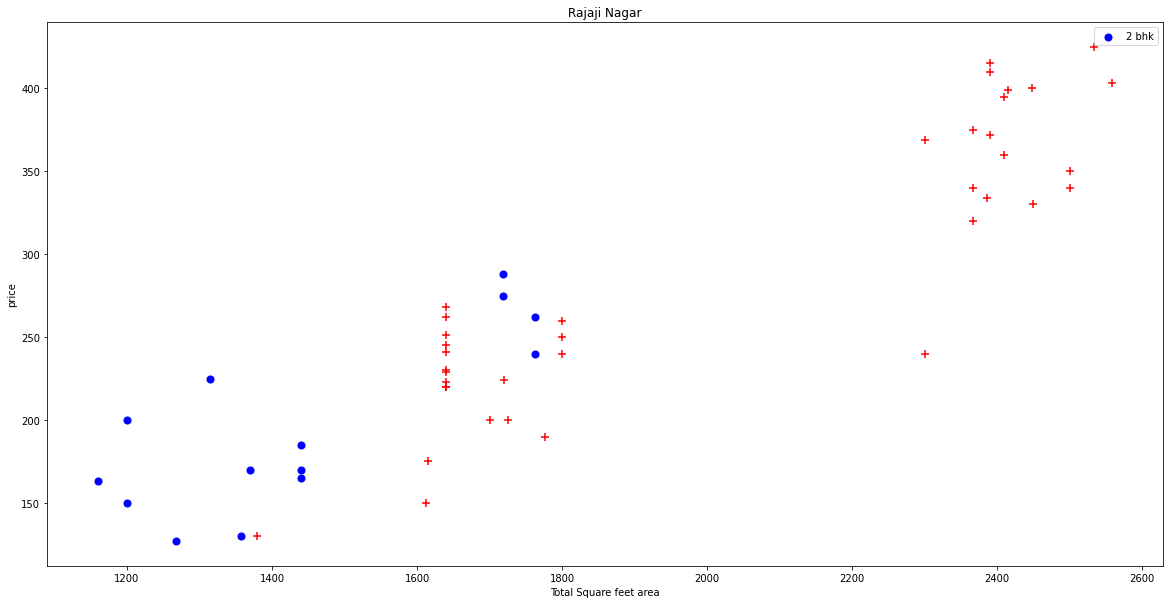

In [47]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 bhk",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color="red",marker="+",s=50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    

plot_scatter_chart(df7,"Rajaji Nagar")    

In [51]:
def remove_bhk_outliners(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats={}
        for bhk ,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                "mean":np.mean(bhk_df.price_per_sqft),
                "std":np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats=bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")
df8=remove_bhk_outliners(df7)
df8.shape

(7329, 7)

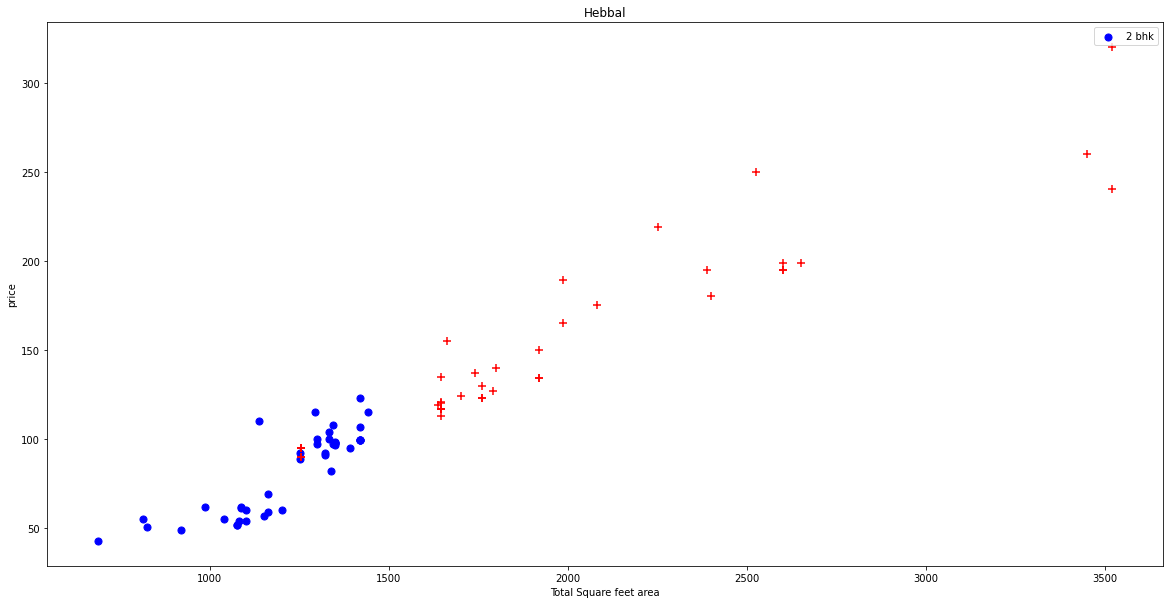

In [56]:
plot_scatter_chart(df8,"Hebbal")

In [57]:
import matplotlib

Text(0, 0.5, 'count')

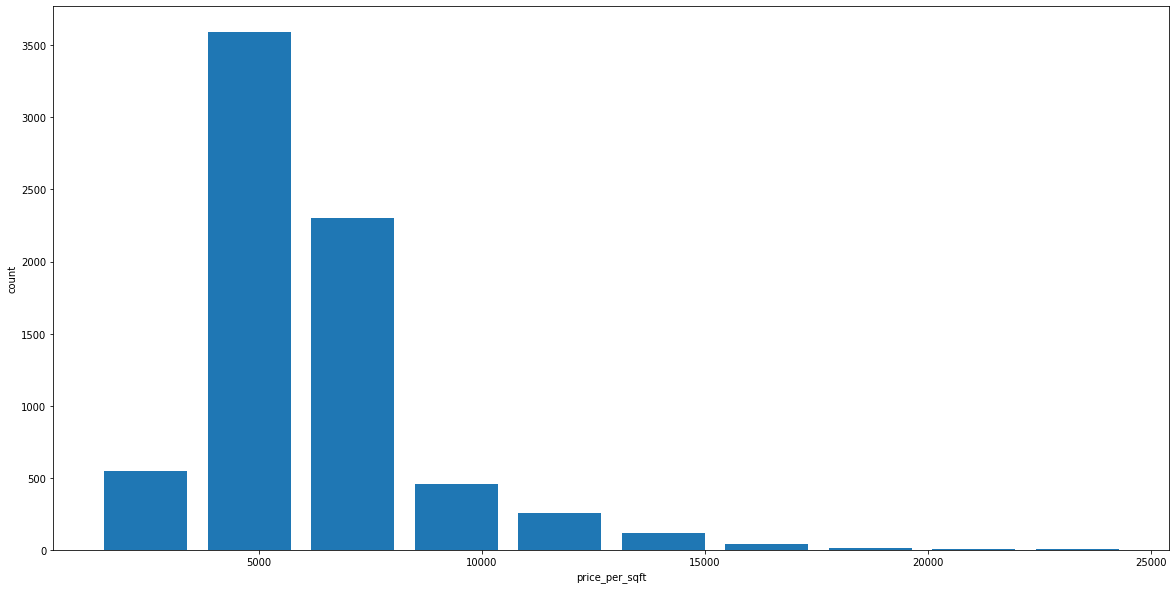

In [61]:

matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)

plt.xlabel("price_per_sqft")
plt.ylabel("count")

In [62]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [65]:
df8[df8.bath>=10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

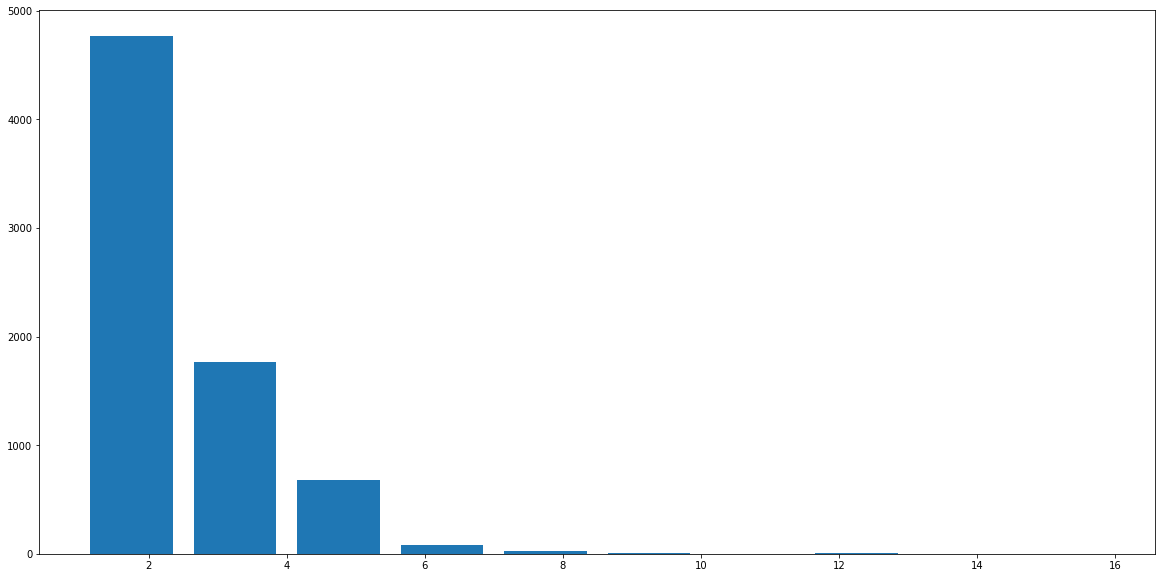

In [66]:
plt.hist(df8.bath,rwidth=0.8)

In [72]:
df8[df8.bath>df8.bhk+2]
df8.shape

(7329, 7)

In [73]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [74]:
df9.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [79]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [80]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df11=pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")

In [82]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df12=df11.drop("location",axis="columns")
X=df12.drop("price",axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df12.shape

(7251, 245)

In [89]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [90]:
 from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [94]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8452277697874329

In [96]:
X.columns


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [107]:
np.where(X.columns=="2nd Phase Judicial Layout")


(array([5], dtype=int64),)

In [115]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])

In [116]:
predict_price("1st Phase JP Nagar",1000,2,2)

c:\users\ayush\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.4990467718764

In [123]:
predict_price("1st Phase JP Nagar",1000,3,3)

c:\users\ayush\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395214311

In [124]:
predict_price("Indira Nagar",1000,2,2)

c:\users\ayush\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006712

In [133]:
import pickle
with open("C:\\Users\\Ayush\\Desktop\\banglore_house.pickle","wb")as f:
    pickle.dump(lr_clf,f)

In [134]:
import json
columns={
    "data_columns" :[col.lower() for col in X.columns]
    
}
with open("C:\\Users\\Ayush\\Desktop\\banglore_columns.json","w")as f:
    f.write(json.dumps(columns))